- COAX-BILL timecourse plot - brainmaps 
- Figure 6a in manuscript

Rekha Varrier, 2021-22

In [1]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle
%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'

In [34]:
# get the right red/blue shades
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

# vid names as saved in behavioral data
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]

In [4]:
#loading shen atlas labels
pd.set_option('display.max_colwidth', None) # so columns are not snipped
# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl.head()
# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [5]:
#suff= ''
suff = '_corrected'

In [6]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc,f'responses{suff}.npy'))
responses.shape

(1049, 10)

In [7]:
tr0_ind = 3 # ind at which tr=0 starts
# timepts_indiv_movie = file with TRs within run to be selected for each movie (including a few fixation TRs at the start and end),
# vid_start_rel_tr = the TR at which the movie begins within each timecourse snippet
# details in 1_1_create_regressors.ipynb
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)

# correcting for an internal error in an earlier version
tr_compensate = 1 # move TR back and low-level regs forward, change to 0 for what we had before
if vid_start_rel_tr[0]==7:
    vid_start_rel_tr -= 1 # vid_start_rel_tr stored are the first timepts AFTER t=0 (these were created for regressors originally, so without subtracting 1, each index
# we get (7, 14 etc.) was when the first nonzero regressor value was to be assigned)
# so without subtracting 1, we could potentially have been losing the earliest TR (check preprocess step 1_1 to verify)

print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):
    # remove unnecessary BOLD timepts (everything not in the range [-3:28])
    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan
    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1

[6 13 13 13 13 6 13 13 13 13]


In [8]:
# COAX-BILL
#select subs who responded "Social" to COAXING-B and "Non-social" to BILLIARD-A
print('\nTrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm',f'timecourse-all-movies_zscorenorm{suff}.npy')
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_trial_z.shape)
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind) # remove unwanted timepts from the fixtion blocks
print('after:',tcs_trial_z.shape)

movie_ind_yes = 0 # CHANGE MOVIE IND HERE - "Social"
movie_ind_no = 1 # CHANGE MOVIE IND HERE - "Non-social"
print('"Social" movie: ' + str(vidnames[movie_ind_yes]))
print('"Non-social" movie: ' + str(vidnames[movie_ind_no]))


Trial-wise norm data.
before: (1049, 268, 56, 10)
after: (1049, 268, 31, 10)
"Social" movie: COAXING-B
"Non-social" movie: BILLIARD-A


<AxesSubplot:>

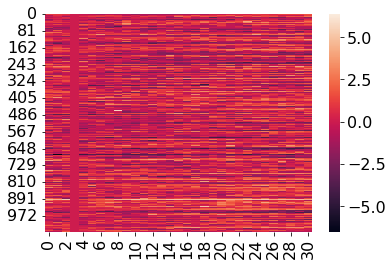

In [11]:
if tr_compensate==1:
    if len(np.where(tcs_trial_z[:,0,tr0_ind+1,0]==0)[0]) == tcs_trial_z.shape[0]:
        print('in')
        for s in range(tcs_trial_z.shape[0]):
            for n in range(tcs_trial_z.shape[1]):
                for m in range(10):
                    tcs_trial_z[s,n,:,m]  = tcs_trial_z[s,n,:,m] - tcs_trial_z[s,n,tr0_ind,m]
sns.heatmap(tcs_trial_z[:,0,:,0])

In [12]:
import time
from joblib import cpu_count
from pymer4.models import Lmer,Lm
from multiprocessing import Pool
from sklearn.linear_model import LinearRegression
from joblib import Parallel,delayed

In [13]:
#subs who respondec "Social" to COAXING-B and "Non-social" to BILLIARD-A
subs = np.where((responses[:,movie_ind_yes] == 1)&(responses[:,movie_ind_no] == 0))[0] 
nsubs = np.where(subs)[0].shape[0]
subs.shape, nsubs

((870,), 870)

In [14]:
def paired_ttest_across_time(tcs_trial_z_node):
    # perform an unpaired t-test at each node and timept for a selected movie (rand here)
    meandiff_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    meandiff_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   
    movie_ind_yes,movie_ind_no = 0,1
    for timept in np.arange(tr0_ind+1,tcs_trial_z_node.shape[1]):
        y1,y2 = tcs_trial_z_node[:,timept,movie_ind_yes],tcs_trial_z_node[:,timept,movie_ind_no]
        try:
            _,pval_soc_nonsoc[timept] = stats.ttest_rel(y1,y2,nan_policy='omit')
            meandiff_soc_nonsoc[timept] = np.nanmean(y1-y2)      
        except:
            pval_soc_nonsoc[timept] = np.nan
            meandiff_soc_nonsoc[timept] = np.nan     
    return pval_soc_nonsoc,meandiff_soc_nonsoc

# test above function
n=0
paired_ttest_across_time(tcs_trial_z[subs,n,:,:])

(array([           nan,            nan,            nan,            nan,
        8.39595563e-01, 7.89820444e-01, 2.15230542e-01, 1.41539239e-01,
        1.87221485e-01, 1.91055742e-02, 3.08862756e-02, 2.99819066e-01,
        5.00341061e-02, 2.64802434e-05, 2.13497586e-02, 1.85257018e-03,
        2.44455772e-03, 4.88846795e-02, 6.98426671e-02, 3.87389143e-01,
        3.12232489e-01, 1.57784027e-02, 2.82584947e-01, 9.86409338e-01,
        2.73984951e-01, 1.83029996e-02, 3.30439638e-01, 1.68492742e-01,
        1.48943567e-01, 6.82634243e-01, 4.04090777e-01]),
 array([        nan,         nan,         nan,         nan, -0.01149751,
        -0.0160108 , -0.07868126, -0.09598114, -0.08268252, -0.15069766,
        -0.13723056, -0.06716502, -0.12492609, -0.27959984, -0.15838979,
        -0.20612534, -0.20956724, -0.12923025, -0.12508801, -0.0613756 ,
        -0.07067311, -0.16736875, -0.0736911 , -0.00117799, -0.07488177,
        -0.16563032, -0.06910561, -0.09623164, -0.10062291, -0.02919547,


In [15]:
parallelise = 0  # parallesing code below for speed

In [16]:
if tr_compensate==1:
    early_late = 'early'
else:
    early_late = 'late'
print(early_late)

early


<AxesSubplot:title={'center':'Mean difference per node and timepoint'}>

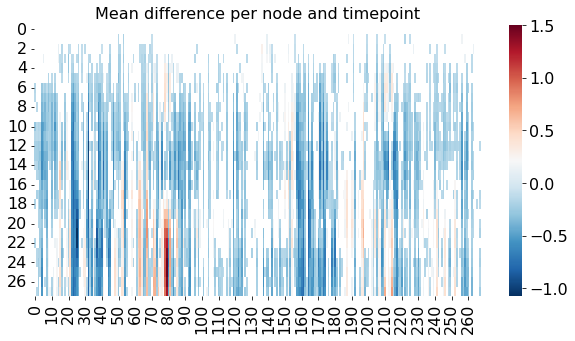

In [18]:
load = 1
plt.figure(1,figsize=(10,5))
if parallelise:
    tcs_node_list = [tcs_trial_z[subs,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
    pval_meandiff_soc_nonsoc_coaxbill = Parallel(n_jobs=10)(delayed(paired_ttest_across_time)(y) for y in tcs_node_list) 

else:
    pval_meandiff_soc_nonsoc_coaxbill = []
    for n in range(268):
        pval_meandiff_soc_nonsoc_coaxbill.append(paired_ttest_across_time(tcs_trial_z[subs,n,:,:]))

np.save(os.path.join(data_file_loc,f'coefs_pvals_alltimepts_COAXBILL_{early_late}.npy'), pval_meandiff_soc_nonsoc_coaxbill)

meanDiff_coaxbill =  np.empty((268,31))
meanDiff_coaxbill[:] = np.nan
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_coaxbill[n] # 31 timepts
    meanDiff_coaxbill[n,pval_<.05] = meanDiff_[pval_<.05]
plt.title('Mean difference per node and timepoint')
sns.heatmap(meanDiff_coaxbill[:,tr0_ind:].T,cmap='RdBu_r')

In [20]:
z_score=1
resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc_z_trialwise_earlyTR.npy'))
resid_tc.shape,resid_tc[0,:2,:,0]

((1049, 268, 31, 2),
 array([[ 0.83691304, -0.17208512,  0.96152918,  0.        ,  0.42850166,
         -0.78743683,  1.23350382,  0.21843582, -0.05434533,  0.26266688,
          2.31023339, -0.04003535,  2.40877029, -0.29777618,  1.7869808 ,
          1.12522038,  1.91990455,  3.40973811,  0.10574118,  2.12340827,
          2.09107391,  3.1388382 ,  2.03049371, -0.75184971,  1.47638697,
          2.118102  ,  1.71641695,  2.28560397,  0.99403189,  1.22803504,
          1.72831163],
        [ 0.10752508,  1.43104672,  0.21644018,  0.        ,  2.22176398,
          0.10019237,  1.37656396,  1.40719806, -0.059071  ,  1.36962841,
          1.17772107,  1.5963565 ,  0.22381827,  0.80375962,  0.73107172,
          2.2554663 ,  2.8794806 ,  2.05613059,  1.7668573 ,  2.18452719,
          1.65281431,  2.88058348, -0.26607939,  0.98514276,  1.05432491,
          0.5188913 ,  3.72787815,  1.07469623,  1.35165127,  1.70285451,
          0.77907174]]))

In [21]:
stats.ttest_rel(resid_tc[subs,n,tr0_ind+1,0],resid_tc[subs,n,tr0_ind+1,1],nan_policy='omit')

Ttest_relResult(statistic=-0.8304880330290058, pvalue=0.40649101290459566)

<AxesSubplot:title={'center':'Mean difference per node and timepoint (resid)'}>

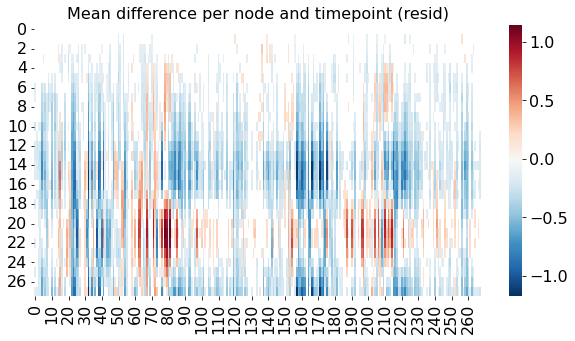

In [22]:
# residuals' analysis
load= 0
plt.figure(1,figsize=(10,5))
if parallelise:
    resid_tc_list = [resid_tc[subs,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
    pval_meandiff_soc_nonsoc_coaxbill_resid = Parallel(n_jobs=10)(delayed(paired_ttest_across_time)(y) for y in resid_tc_list) 
else:
    pval_meandiff_soc_nonsoc_coaxbill_resid = []
    for n in range(268):
        pval_meandiff_soc_nonsoc_coaxbill_resid.append(paired_ttest_across_time(resid_tc[subs,n,:,:]))

np.save(os.path.join(data_file_loc,f'coefs_pvals_alltimepts_COAXBILL_resid_{early_late}.npy'), pval_meandiff_soc_nonsoc_coaxbill_resid)
    
meanDiff_coaxbill_resid =  np.empty((268,31))
meanDiff_coaxbill_resid[:] = np.nan
for n in range(268):
    pval_resid, meanDiff_resid = pval_meandiff_soc_nonsoc_coaxbill_resid[n]
    meanDiff_coaxbill_resid[n,pval_resid<.05] = meanDiff_resid[pval_resid<.05]
plt.title('Mean difference per node and timepoint (resid)')
sns.heatmap(meanDiff_coaxbill_resid[:,tr0_ind:].T,cmap='RdBu_r')

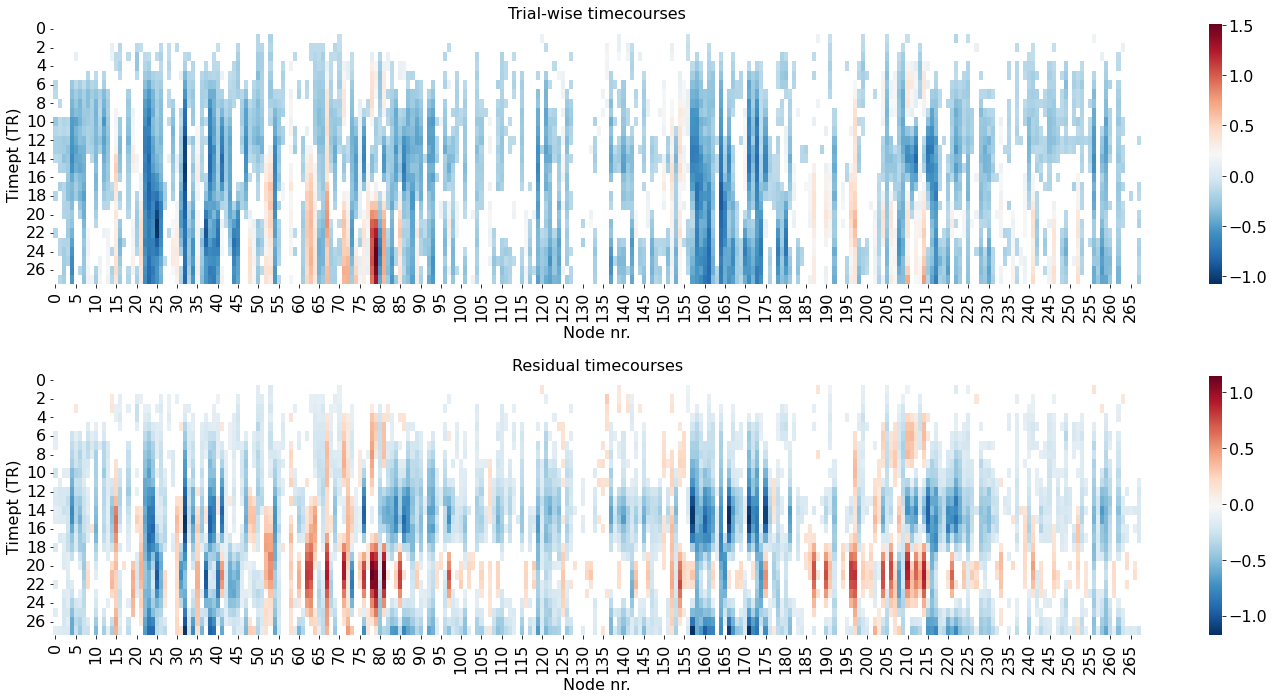

In [23]:
plt.figure(1,figsize=(20,10))
plt.subplot(211)
plt.title('Trial-wise timecourses')
sns.heatmap(meanDiff_coaxbill[:,tr0_ind:].T,cmap='RdBu_r')
plt.xlabel('Node nr.')
plt.ylabel('Timept (TR)')
plt.subplot(212)
plt.title('Residual timecourses')
sns.heatmap(meanDiff_coaxbill_resid[:,tr0_ind:].T,cmap='RdBu_r')
plt.xlabel('Node nr.')
plt.ylabel('Timept (TR)')
plt.tight_layout()

In [24]:
# get earliest TR of divergence COAX-BILL (used for plotting figure 6a below!)

earliest_pt_coaxbill, sign_earliest_pt_coaxbill = [np.empty((268,)) for _ in range(2)]
earliest_pt_coaxbill[:], sign_earliest_pt_coaxbill[:] = [np.nan]*2
for n in np.arange(0,268): # np.arange(10):
    sig_timepts =  np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
    for t in sig_timepts:
        if t < 30:
            if (t+1) in sig_timepts: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                earliest_pt_coaxbill[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_coaxbill[n] = np.sign(meanDiff_coaxbill[n,t])
                break             

earliest_pt_coaxbill_resid, sign_earliest_pt_coaxbill_resid = [np.empty((268,)) for _ in range(2)]
earliest_pt_coaxbill_resid[:], sign_earliest_pt_coaxbill_resid[:] = [np.nan]*2
for n in np.arange(0,268): # np.arange(10):
    sig_timepts_resid =  np.where(~np.isnan(meanDiff_coaxbill_resid[n,:]))[0]
    for t in sig_timepts_resid:
        if t < 30:
            if (t+1) in sig_timepts_resid:
                earliest_pt_coaxbill_resid[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_coaxbill_resid[n] = np.sign(meanDiff_coaxbill_resid[n,t])
                break

In [26]:
# get a variable storing whether nodes show a difference in the end
end_diff_coaxbill,   sign_end_diff_coaxbill,    end_diff_coaxbill_resid,    sign_end_diff_coaxbill_resid    = \
[np.empty((268,)) for _ in range(4)]
end_diff_coaxbill[:],sign_end_diff_coaxbill[:], end_diff_coaxbill_resid[:], sign_end_diff_coaxbill_resid[:] = [np.nan]*4

for n in range(268):# np.arange(10):
    sig_timepts       =  np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
    sig_timepts_resid =  np.where(~np.isnan(meanDiff_coaxbill_resid[n,:]))[0]
    
    if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
        tcn1 = np.nanmean(tcs_trial_z[subs,n,-2:,movie_ind_yes],axis=1)# subs * t:end (if it's the onset of a divergence, there will be a difference in the end too)
        tcn2 = np.nanmean(tcs_trial_z[subs,n,-2:,movie_ind_no],axis=1)
        _,pval_end = stats.ttest_rel(tcn1,tcn2,nan_policy='omit')
        meandiff_end = np.nanmean(tcn1 - tcn2)
        if pval_end < .05:
            end_diff_coaxbill[n],sign_end_diff_coaxbill[n] = 1,np.sign(meandiff_end)
    
    if len(sig_timepts_resid) > 2: # no pt doing this if there aren't at least 2 sig pts
        tcn1 = np.nanmean(resid_tc[subs,n,-2:,movie_ind_yes],axis=1)# subs * t:end (if it's the onset of a divergence, there will be a difference in the end too)
        tcn2 = np.nanmean(resid_tc[subs,n,-2:,movie_ind_no],axis=1)
        _,pval_end = stats.ttest_rel(tcn1,tcn2,nan_policy='omit')
        meandiff_end_resid = np.nanmean(tcn1 - tcn2) 
        if pval_end < .05:
            end_diff_coaxbill_resid[n],sign_end_diff_coaxbill_resid[n] = 1,np.sign(meandiff_end_resid)

In [27]:
early_late = 'early'

In [29]:
load = 1 # CHANGE HERE IF NEEDED.
if load: # load saved data
    [earliest_pt_coaxbill,sign_earliest_pt_coaxbill]= np.load(os.path.join(data_file_loc,f'earliest_pt_div_coaxbill_{early_late}.npy'))
    [end_diff_coaxbill,sign_end_diff_coaxbill]= np.load(os.path.join(data_file_loc,f'end_pt_div_coaxbill_{early_late}.npy'))
    [earliest_pt_coaxbill_resid,sign_earliest_pt_coaxbill_resid] = np.load(os.path.join(data_file_loc,f'earliest_pt_div_coaxbill_resid_{early_late}.npy'))
    [end_diff_coaxbill_resid,sign_end_diff_coaxbill_resid] = np.load(os.path.join(data_file_loc,f'end_pt_div_coaxbill_resid_{early_late}.npy'))
else: # save earlier point data
    np.save(os.path.join(data_file_loc,f'earliest_pt_div_coaxbill_{early_late}.npy'),       [earliest_pt_coaxbill,sign_earliest_pt_coaxbill])
    np.save(os.path.join(data_file_loc,f'end_pt_div_coaxbill_{early_late}.npy'),            [end_diff_coaxbill,sign_end_diff_coaxbill])
    np.save(os.path.join(data_file_loc,f'earliest_pt_div_coaxbill_resid_{early_late}.npy'), [earliest_pt_coaxbill_resid,sign_earliest_pt_coaxbill_resid])
    np.save(os.path.join(data_file_loc,f'end_pt_div_coaxbill_resid_{early_late}.npy'),      [end_diff_coaxbill_resid,sign_end_diff_coaxbill_resid])

In [30]:
#  coax-bill
# plot timecourses with all timepts of divergences
plot_all=0
if plot_all:
    ncols,nrows = 6,int(np.ceil(268/ncols))
    xwidth,yheight = 20,100# .75*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    x_ticks = np.round(np.linspace(0,30,4),2)  
    ymin,ymax = -.5,2
    lbls = [str(i-tr0_ind) for i in x_ticks]
    movie_ind = 4
    for n in range(268):
        movieTC_yes = tcs_trial_z[subs,n,:,myes] # nsubs * ntimepts
        movieTC_no  = tcs_trial_z[subs,n,:,mno] # nsubs * ntimepts
        r = int(np.floor(n/ncols))
        c = int(np.floor(n%ncols))
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
        ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
        ax[r,c].hlines(0,0,31,color='grey')
        sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
        ax[r,c].plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
        ax[r,c].plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
        if end_diff_coaxbill[n] == 1:
            ax[r,c].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
        ax[r,c].set_title(f'Node {n+1}')
        if n == 5:
            ax[r,c].legend(bbox_to_anchor=[1.05,1])
        ax[r,c].set_xticks(x_ticks)
        ax[r,c].set_xticklabels(lbls)
    ax[r,c+1].axis('off')
    ax[r,c+2].axis('off')
    plt.tight_layout()

In [31]:
earliest_pt_coaxbill_corrected = earliest_pt_coaxbill - tr0_ind
earliest_pt_coaxbill_corrected_resid = earliest_pt_coaxbill_resid - tr0_ind

# Plot brainmaps

In [35]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/')

In [36]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_surf_roi, plot_img, plot_surf_contours,view_surf
from nilearn import datasets,surface,image
import nibabel as nib

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
fsaverage = datasets.fetch_surf_fsaverage()
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))

bg_img = datasets.load_mni152_template()
lbl = [str.upper(x[0:4]) for x in vidnames]
lbl

['COAX',
 'BILL',
 'DRIF',
 'FISH',
 'RAND',
 'SCAR',
 'SEDU',
 'STAR',
 'SURP',
 'TENN']

In [39]:
# for comparison with the other main figure if needed
# all social processing nodes from Figure 3
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
len(np.where(nodes_coaxbill_rand_all)[0])

70

In [40]:
def color_rois(values):
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    # same as the script used in the GLM plots, 2_3_.. , 2_4_.. etc.
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    return img_nii

In [41]:
#coords = [10*int(i) for i in np.linspace(-4,7,6)]
coords = [-40,-25,-10,0,10,25,40,60]
TR=.72
time_units = 'sec' # 'sec','TR'
log_scale = 1
cmap ='viridis'
# present all results in seconds

In [42]:
v5_roi = 'v5_association-test_z_FDR_0.01.nii'
v5_roi_loc = f'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/ROIs/{v5_roi}'
v5_roi_nii = nib.load(v5_roi_loc)

psts_roi = 'psts_association-test_z_FDR_0.01.nii'
psts_roi_loc = f'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/ROIs/{psts_roi}'
psts_roi_nii = nib.load(psts_roi_loc)

(10242, 227, 5.505677219492696, 3.734893426946704)

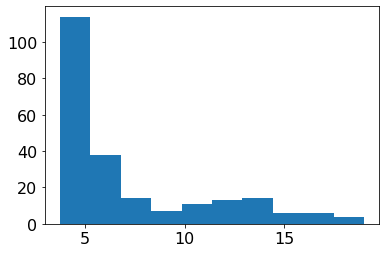

In [43]:
texture = surface.vol_to_surf(v5_roi_nii,                          fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
thr99 = np.quantile(texture,.99)

plt.hist(texture[texture!=0])
len(texture),len(np.where(texture!=0)[0]),thr99,min(texture[texture!=0])

In [44]:
# COAX-BILL, surface p[ot
def surfplotL_COAXBILL(earliest_pt_coaxbill_corrected, ax1,ax2,scale_type='log',dat_type='resid',max_TR = 5):
    nodes = np.zeros((268,))
    nodes_ind = nodes_coaxbill_rand_all    
    nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind]*TR)
    vmin,vmax = np.log(.72),np.log(np.round(max_TR*.72))
    
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax1,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax2,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False,view='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
   
    # add contour
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot2, legend=False, axes=ax2,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    
def surfplotR_COAXBILL(earliest_pt_coaxbill_corrected, ax1,ax2,subplot_num=2,scale_type='log',dat_type = 'resid',max_TR=5):
    # right
    #max_TR = 5
    nodes = np.zeros((268,))
    #nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
    nodes_ind = nodes_coaxbill_rand_all
    
    nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind]*TR)
    vmin,vmax = np.log(.72),np.log(np.round(max_TR*.72))
    
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax1, view='medial')
    surf_plot2=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax2)
    tks = surf_plot2.axes[subplot_num].get_yticks()
    if scale_type == 'log':
        tklabels = [np.round(i,1) for i in np.exp(tks)]
    elif scale_type == 'linear':
        tklabels = [np.round(i,1) for i in tks]
    
    surf_plot2.axes[subplot_num].set_yticklabels(tklabels,fontsize=24)
    surf_plot2.axes[subplot_num].text(8,2,s='  Divergence\n  point (s,\n  log scale)',fontsize=24, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
 
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,labels=['GLM analysis nodes'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot2, legend=False, axes=ax2,levels=[1],colors=['k'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])

# COAX-BILL, axial p[ot
def axplot_COAXBILL(earliest_pt_coaxbill_corrected,fig,ax,scale_type='log',dat_type='resid',max_TR = 5):
    nodes = np.zeros((268,))
    #nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
    nodes_ind = nodes_coaxbill_rand_all    
    nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind]*TR)
    vmin,vmax = np.log(.72),np.log(np.round(max_TR*.72))
    img = roi_to_brain(pd.Series(nodes), mask_x)
    ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, figure=fig,
    cut_coords = coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001,axes=ax)

# Surface plot used in figure 6a

- Plot of where activity starts diverging (using the residuals)

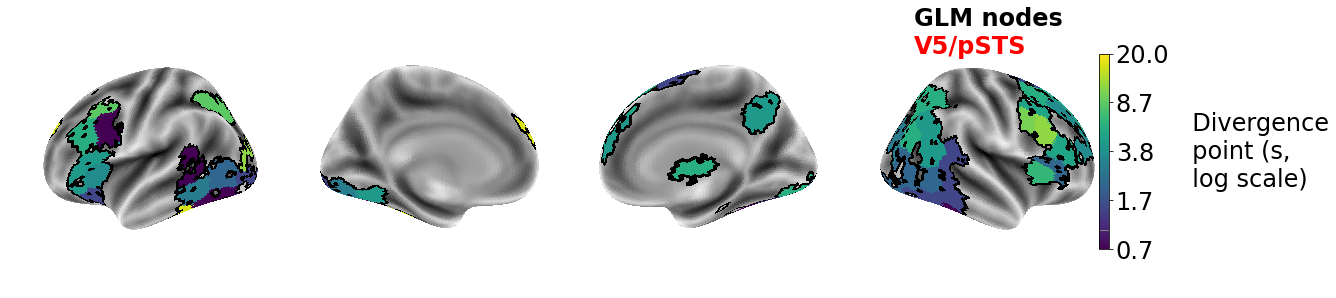

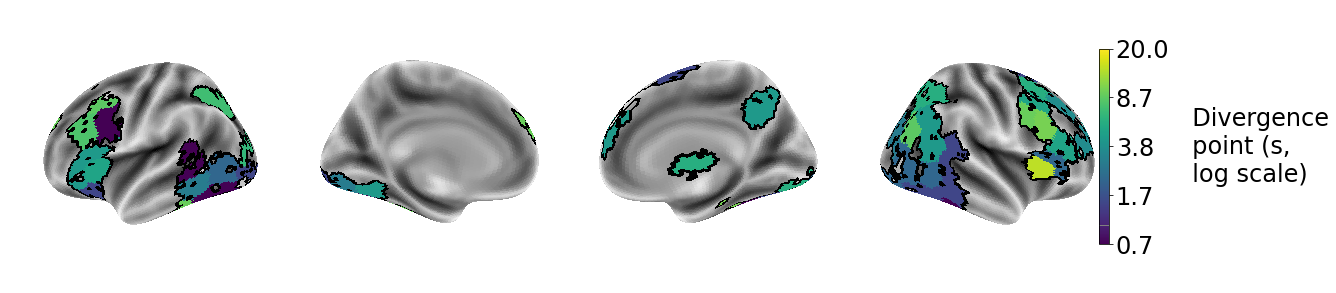

In [82]:
# surface plots
early_late = 'early'

fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
max_TR = 28
surfplotL_COAXBILL(earliest_pt_coaxbill_corrected,ax[0],ax[1],scale_type='log',dat_type='resid',max_TR =max_TR)
subplot_num = 4
surfplotR_COAXBILL(earliest_pt_coaxbill_corrected, ax[2],ax[3],subplot_num,scale_type='log',dat_type='resid',max_TR = max_TR)
ax[3].annotate('GLM nodes', xy=(.25,.95), xycoords='axes fraction',fontsize = 24,fontweight='bold')
ax[3].annotate('V5/pSTS', xy=(.25,.85), xycoords='axes fraction', color='r',fontsize = 24,fontweight='bold')
plt.subplots_adjust(wspace=0.001)
plt.savefig(os.path.join(fig_save_loc,f'coaxbill/surfplot_both_hem_maxTR{max_TR}_{early_late}.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(20,6),subplot_kw={'projection': '3d'})
max_TR = 28
surfplotL_COAXBILL(earliest_pt_coaxbill_corrected_resid,ax[0],ax[1],scale_type='log',dat_type='resid',max_TR =max_TR)
subplot_num = 4
surfplotR_COAXBILL(earliest_pt_coaxbill_corrected_resid, ax[2],ax[3],subplot_num,scale_type='log',dat_type='resid',max_TR = max_TR)
plt.subplots_adjust(wspace=0.001)
plt.savefig(os.path.join(fig_save_loc,f'coaxbill/surfplot_both_hem_maxTR{max_TR}_resid_{early_late}.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

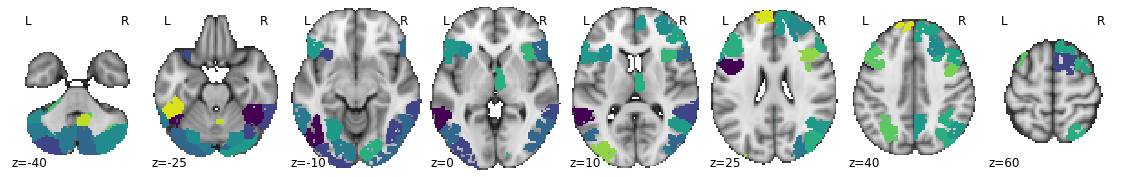

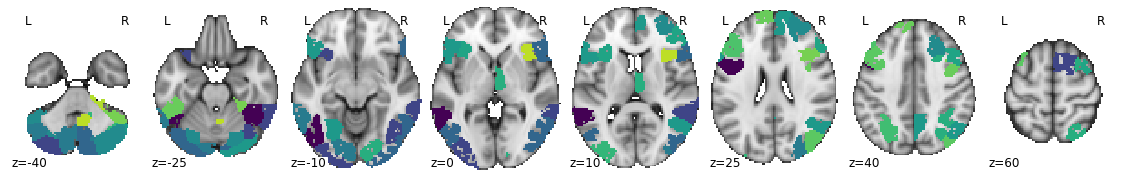

In [83]:
# axial plot
max_TR = 28
fig,ax = plt.subplots(nrows=1, ncols= 1,figsize=(20,3))
axplot_COAXBILL(earliest_pt_coaxbill_corrected,scale_type='log',dat_type='resid',max_TR = max_TR, fig=fig,ax=ax)
plt.savefig(os.path.join(fig_save_loc,f'coaxbill/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

# axial plot
fig,ax = plt.subplots(nrows=1, ncols= 1,figsize=(20,3))
axplot_COAXBILL(earliest_pt_coaxbill_corrected_resid,scale_type='log',dat_type='resid',max_TR = max_TR,fig=fig,ax=ax)
plt.savefig(os.path.join(fig_save_loc,f'coaxbill/axial_resid.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

In [81]:
# COAX-BILL, surface p[ot
def view_surfplot_COAXBILL(earliest_pt_coaxbill_corrected, max_TR = 5):
    #max_TR = 5
    nodes = np.zeros((268,))
    nodes_ind = nodes_coaxbill_rand_all    
    nodes[nodes_ind] = earliest_pt_coaxbill_corrected[nodes_ind]*TR
    vmin,vmax = .72,np.round(max_TR*.72)
    v5_texture = surface.vol_to_surf(v5_roi_nii, fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    thr99 = np.quantile(v5_texture,.99)
    v5_texture[v5_texture<thr99] = 0
    v5_texture[v5_texture!=0] = 1
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    vsurf_plot1=view_surf(fsaverage.infl_left, texture,cmap = cmap, colorbar=True, vmax = vmax,
                            threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cmap = False)        
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    vsurf_plot2=view_surf(fsaverage.infl_right, texture,cmap = cmap, colorbar=True, vmax = vmax,
                            threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cmap = False)
    
    return vsurf_plot1, vsurf_plot2

vsurf_plot1, vsurf_plot2 = view_surfplot_COAXBILL(earliest_pt_coaxbill_corrected,max_TR)
flname = os.path.join(fig_save_loc,f'coaxbill/view_surfplot_maxTR{max_TR}_Left.html')
vsurf_plot1.save_as_html(flname)

flname = os.path.join(fig_save_loc,f'coaxbill/view_surfplot_maxTR{max_TR}_Right.html')
vsurf_plot2.save_as_html(flname)

vsurf_plot1, vsurf_plot2 = view_surfplot_COAXBILL(earliest_pt_coaxbill_corrected_resid,max_TR)
flname = os.path.join(fig_save_loc,f'coaxbill/view_surfplot_maxTR{max_TR}_Left_resid.html')
vsurf_plot1.save_as_html(flname)
flname = os.path.join(fig_save_loc,f'coaxbill/view_surfplot_maxTR{max_TR}_Right_resid.html')
vsurf_plot2.save_as_html(flname)